[Glass Database]  <https://archive.ics.uci.edu/ml/machine-learning-databases/glass/">

In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

glass_df = pd.read_csv("glass.txt", header = None)
column_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
glass_df.columns = column_names

glass_lookup = {1: "building_windows_float_processed",
                2: "building_windows_non_float_processed",
                3: "vehicle_windows_float_processed",
                4: "vehicle_windows_non_float_processed (none in this database)",
                5: "containers",
                6: "tableware",
                7: "headlamps"}

In [509]:
#train_test_split

X = glass_df[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
y = glass_df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [510]:
from sklearn.neighbors import KNeighborsClassifier

In [511]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train, y_train)
print("Model score: ", knn.score(X_test, y_test))

Model score:  0.685185185185


In [512]:
#random row instance from test set to predict the class

import random

X_test_instc = X_test.loc[np.random.choice(X_test.index, 1, replace=False)]
glass_predict = knn.predict(X_test_instc)

print("Predicted glass type: ", glass_lookup[glass_predict[0]])

#actual class vs prediction
y_test_instc = pd.Series.to_frame(y_test)
X_test_instc.reset_index(level = 0, inplace = True)
y_test_instc.reset_index(level = 0, inplace = True)

print("Predicted class:", glass_predict[0]) 
print("Actual class:", y_test_instc.loc[y_test_instc["index"] == X_test_instc.iloc[0,0], "Type"].to_string(index=False))

Predicted glass type:  building_windows_non_float_processed
Predicted class: 2
Actual class: 2


<IPython.core.display.Javascript object>


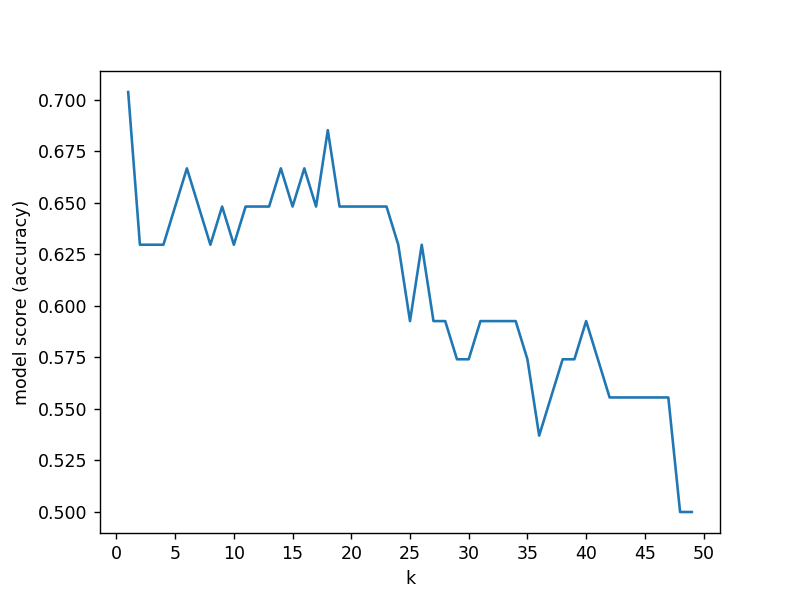

In [513]:
score = []
k = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    k.append(i)
    
plt.figure()
plt.xlabel("k")
plt.ylabel("model score (accuracy)")
plt.plot(k, score)
plt.xticks(range(0, 55, 5));

<IPython.core.display.Javascript object>


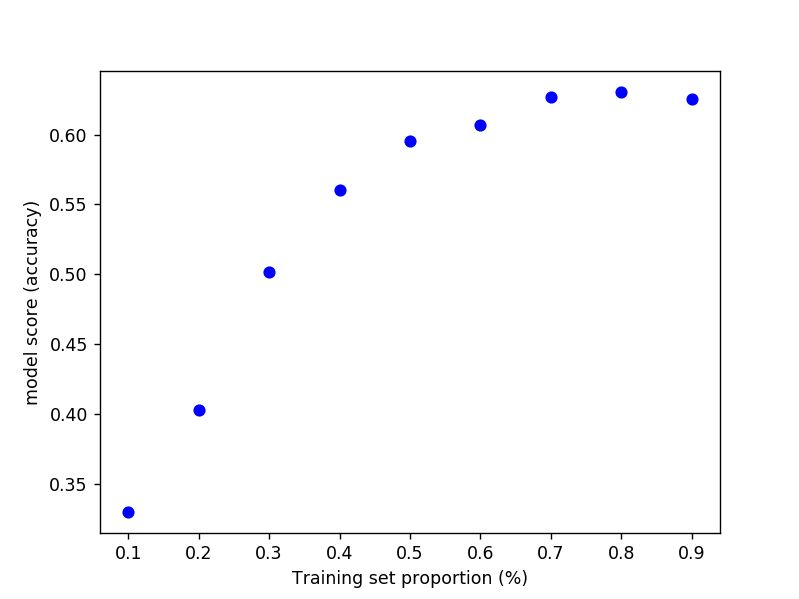

In [498]:
t = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

plt.figure()
plt.xlabel('Training set proportion (%)')
plt.ylabel('model score (accuracy)');

for s in t:
    scores = []
    for i in range(1,100):
        knn = KNeighborsClassifier(n_neighbors = 18)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1- s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')